In [2]:
%matplotlib inline

In [3]:
# Import dependencies 
import matplotlib.pyplot as plt 
import pandas as pd 


In [4]:
# Load files 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read data 
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
# Inspect city data
city_data_df.count()
city_data_df.isnull().sum()
city_data_df.dtypes

#Get unique values for city types
city_data_df["type"].unique()

# Sum of urban cities 
sum(city_data_df["type"]=="Rural")

18

In [7]:
# Inspect ride data 
ride_data_df.count()
ride_data_df.isnull().sum()
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
# MERGE TWO DATA FRAMES 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# TASKS:
# 1) Get average fare per city, 2) Get total # of rides per city, #3) Get number of drivers per city type 


In [10]:
# CREATE DATA FRAMES FOR EACH CITY TYPE
 
urban = pyber_data_df["type"]=="Urban"
urban_cities_df=pyber_data_df[urban]
urban_cities_df.head()

suburban = pyber_data_df["type"]=="Suburban"
suburban_cities_df=pyber_data_df[suburban]
suburban_cities_df.head()

rural = pyber_data_df["type"]=="Rural"
rural_cities_df=pyber_data_df[rural]
rural_cities_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [11]:
# ET NUMBER OF RIDES PER CITY IN EACH TYPE CATEGORY

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [12]:
# GET THE AVERAGE FARE FOR EACH CITY PER TYPE 

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [13]:
# GET THE AVERAGE NUMBER OF DRIVERS PER CITY BY TYPE

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

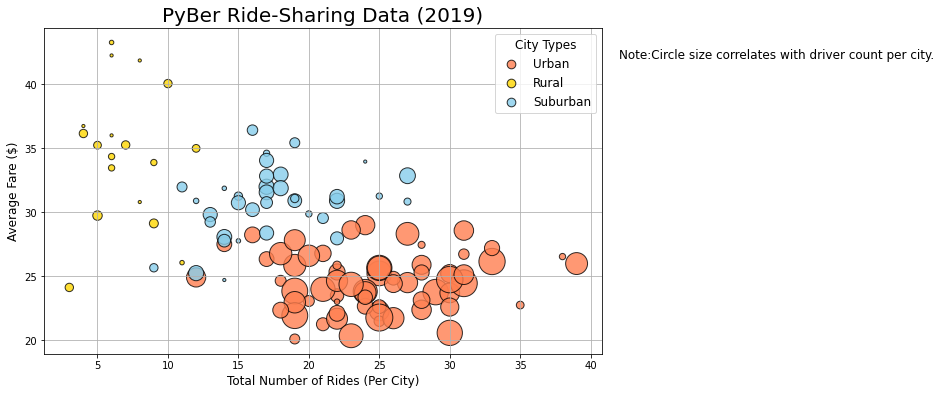

In [14]:
# SCATTER PLOTS FOR EACH CITY TYPE

plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolors="black",
           linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolors="black",
           linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolors="black",
           linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate label regarding bubble size 
plt.text(42, 42, "Note:Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()

In [15]:
# Describe method 

urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

# Ride count stats 

urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [16]:
# Use functions instead for ride counts 

round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
urban_ride_count.median()
urban_ride_count.mode()
suburban_ride_count.mode()

0    17
dtype: int64

In [17]:
# Use NumPy and SciPy statistical modules --> IMPORT

import numpy as np
import scipy.stats as sts

In [18]:
# PRACTICE WITH NUMPY AND SCIPY.STATS  

# RIDE COUNT STATS 

mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)

print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.\n")

mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.\n")


mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)

print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.\n")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).



In [19]:
# FARE STATISTICS 

urban_fare = urban_cities_df["fare"]
mean_urban_fares = np.mean(urban_fare)
median_urban_fares = np.median(urban_fare)
mode_urban_fares = sts.mode(urban_fare)

print(f"URBAN: mean is {mean_urban_fares:.2f}")
print(f"URBAN: median is {median_urban_fares:.2f}")
print(f"URBAN: mode is {mode_urban_fares}\n")


suburban_fare = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fare)
median_suburban_fares = np.median(suburban_fare)
mode_suburban_fares = sts.mode(suburban_fare)

print(f"SUBURBAN: mean is {mean_suburban_fares:.2f}")
print(f"SUBURBAN: median is {median_suburban_fares:.2f}")
print(f"SUBURBAN: mode is {mode_suburban_fares}\n")


rural_fare = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fare)
median_rural_fares = np.median(rural_fare)
mode_rural_fares = sts.mode(rural_fare)

print(f"RURAL: mean is {mean_rural_fares:.2f}")
print(f"RURAL: median is {median_rural_fares:.2f}")
print(f"RURAL: mode is {mode_rural_fares}\n")


URBAN: mean is 24.53
URBAN: median is 24.64
URBAN: mode is ModeResult(mode=array([22.86]), count=array([5]))

SUBURBAN: mean is 30.97
SUBURBAN: median is 30.75
SUBURBAN: mode is ModeResult(mode=array([17.99]), count=array([3]))

RURAL: mean is 34.62
RURAL: median is 37.05
RURAL: mode is ModeResult(mode=array([37.05]), count=array([2]))



In [20]:
# STATISTICS FOR DRIVER COUNT 

urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

print(f"URBAN: mean is {mean_urban_drivers:.2f}")
print(f"URBAN: median is {median_urban_drivers:.2f}")
print(f"URBAN: mode is {mode_urban_drivers}\n")


mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f"SUBURBAN: mean is {mean_suburban_drivers:.2f}")
print(f"SUBURBAN: median is {median_suburban_drivers:.2f}")
print(f"SUBURBAN: mode is {mode_suburban_drivers}\n")


mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f"RURAL: mean is {mean_rural_drivers:.2f}")
print(f"RURAL: median is {median_rural_drivers:.2f}")
print(f"RURAL: mode is {mode_rural_drivers}\n")

URBAN: mean is 36.68
URBAN: median is 37.00
URBAN: mode is ModeResult(mode=array([39], dtype=int64), count=array([86]))

SUBURBAN: mean is 13.71
SUBURBAN: median is 16.00
SUBURBAN: mode is ModeResult(mode=array([20], dtype=int64), count=array([79]))

RURAL: mean is 4.30
RURAL: median is 4.00
RURAL: mode is ModeResult(mode=array([1], dtype=int64), count=array([32]))



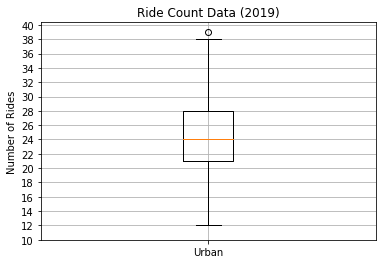

In [21]:
# CREATE BOX AND WHISKER PLOTS FOR RIDE COUNT DATA using ax.boxplot 

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

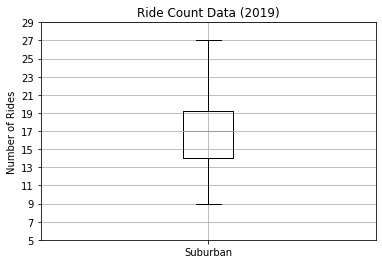

In [22]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()
plt.show()

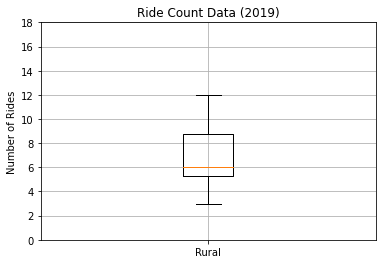

In [23]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()

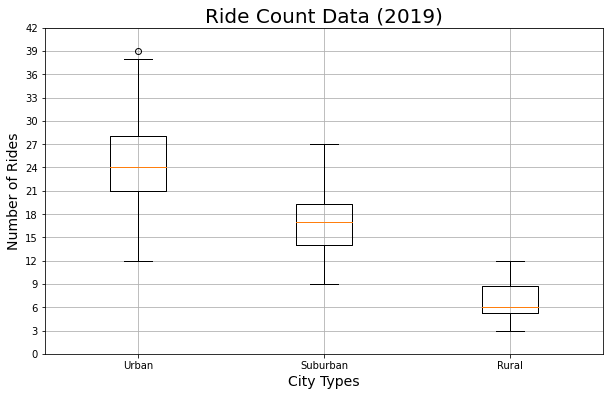

In [24]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [25]:
# Get the outlier that matches 39 

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


<function matplotlib.pyplot.show(close=None, block=None)>

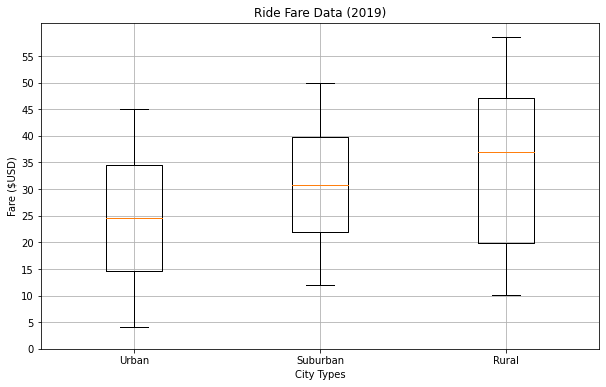

In [26]:
# Box and whisker plots for ride fare data 

x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("City Types")
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

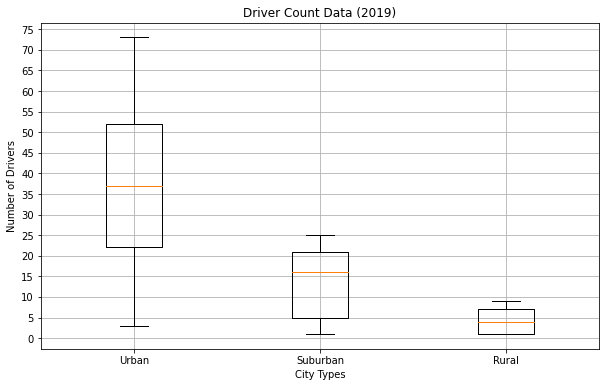

In [27]:
# Box and whisker plots for driver count data 

x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City Types")
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show

In [36]:
# PIE CHART 
# Get the sum of all fares by city type 
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

# Get sum of all fares 

total_fares = pyber_data_df["fare"].sum()
total_fares

# Get percentage for each type 
type_percents = sum_fares_by_type / total_fares * 100
type_percents 

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

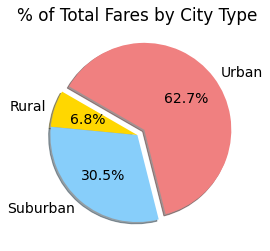

In [44]:
# Build pie chart 

# Import matplotlib library as mpl so we can access rcParams
import matplotlib as mpl

plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = "%.1f%%",
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig5.png")

plt.show()

In [47]:
# Calculate Ride percentages 

ride_percents = 100 * (pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count())
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

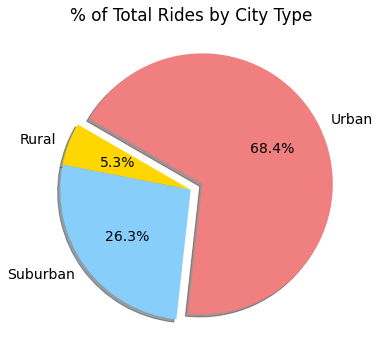

In [54]:
# Pie chart for ride count percentages by city type

plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow="True", startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"] = 14
plt.savefig("Analysis/Fig6.png")
plt.show()

In [56]:
# Calculate Driver percentages 

driver_percents = 100 * (city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum())
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

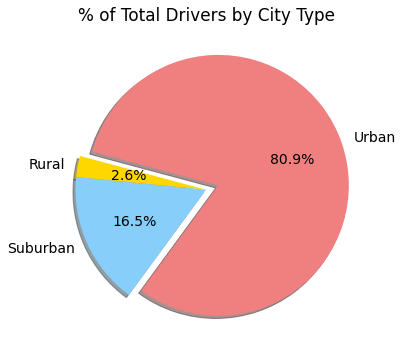

In [57]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Fig7.png")
# Show Figure
plt.show()